In [1]:
from os.path import join, dirname
from glob import glob

import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib

import matplotlib.pyplot as plt
from matplotlib import cm, colors, patches, lines

from nilearn import image, plotting, masking

# Figure 3 A

In [2]:
dir_root = join('/mnt/ext5/GP/fmri_data')
dir_mask = join(dir_root,'masks')

In [3]:
img_bg = join('/usr/local/afni/abin/MNI152_2009_template.nii.gz')

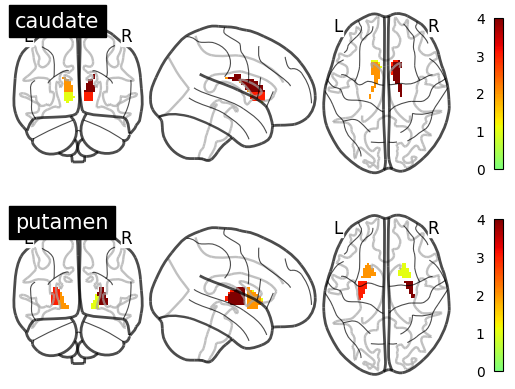

In [4]:
fig, axs = plt.subplots(nrows=2)

imgs = {}
for ii, roi in enumerate(['caudate','putamen']):
    ax = axs[ii]
    imgs[roi] = image.load_img(
        join(dir_mask,'mask.TTatlas.%s.resampled.nii'%roi)
    )
    plotting.plot_glass_brain(
        imgs[roi],
        title=roi,
        cmap=cm.jet, colorbar=True,
        axes=ax
    )

In [5]:
# Load the Nifti file
nifti_file = join(dir_mask,'mask.TTatlas.putamen.resampled.nii')
img = nib.load(nifti_file)
data = img.get_fdata()

# Print unique values in the data to check current labels
print(np.unique(data))

data_swapped = np.copy(data)
data_swapped[data == 0] = 0
data_swapped[data == 2] = 1
data_swapped[data == 3] = 2
data_swapped[data == 1] = 3
data_swapped[data == 4] = 4

# # Save the modified data to a new Nifti file
# new_img = nib.Nifti1Image(data_swapped, img.affine, img.header)
# new_nifti_file = '/home/kjh/Desktop/GP/atlas/mask.TTatlas.putamen.resampled.sorted.nii'
# nib.save(new_img, new_nifti_file)

[0. 1. 2. 3. 4.]


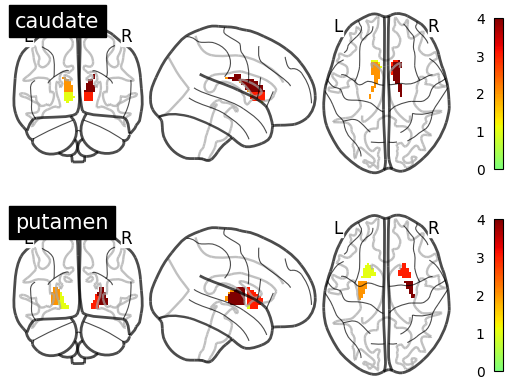

In [6]:
fig, axs = plt.subplots(nrows=2)

imgs = {}
for ii, roi in enumerate(['caudate','putamen']):
    ax = axs[ii]
    imgs[roi] = image.load_img(
        join(f'/home/kjh/Desktop/GP/atlas/mask.TTatlas.{roi}.resampled.sorted.nii')
    )
    plotting.plot_glass_brain(
        imgs[roi],
        title=roi,
        cmap=cm.jet, colorbar=True,
        axes=ax
    )

In [7]:
img_mask = image.math_img(
    img1=imgs['putamen'], img2=imgs['caudate'],
    formula='img1 + (img2+4)*(img2>0)'
)

In [8]:
list_label=[
    'raPU', 'laPU', 'lpPU', 'rpPU',
    'laCA', 'lpCA', 'raCA', 'rpCA'
]

/tmp/ipykernel_2221086/1539858524.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow')


(0.0, 1.0, 0.0, 1.0)

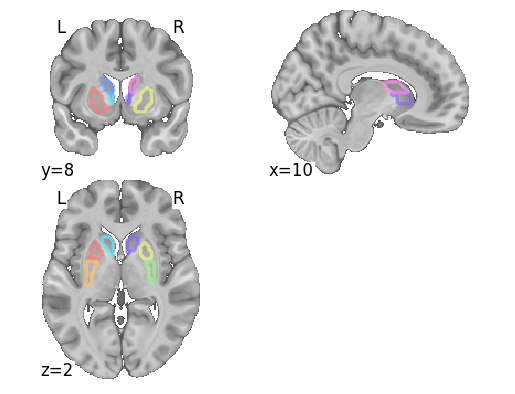

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from nilearn.plotting import plot_roi

# Define your custom colors
# custom_colors = ['#fb7b77', '#fdc170', '#f3f87f', '#98f786', '#69ebfc', '#6d9efc', '#937df8', '#f78ef0']
# custom_colors = ['#ff0000', '#ff8c00', '#e1ff00', '#44ff00', '#00f7ff', '#0016de', '#a600ff', '#f700f3']
custom_colors = ['#fb7b77', '#fdc170', '#f3f87f', '#98f786', '#69ebfc', '#6d9efc', '#8f66ff', '#f78ef0']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

fig, ax = plt.subplots()

## Plotting Nilearn ROIs
display = plotting.plot_roi(
    img_mask, black_bg=False,
    bg_img=img_bg,
    display_mode='tiled', draw_cross=False,
    cut_coords=(10,8,2),
    view_type='contours', linewidths=2.5,
    cmap=custom_cmap,
    axes=ax
)
# display.add_contours(img_striatum, filled=False, cmap='gist_rainbow')

### legend
nax = fig.add_axes([0.55, 0.1, .16, .4])

cmap = cm.get_cmap('gist_rainbow')
colors = np.round(np.linspace(0, cmap.N-1, len(list_label)+1)).astype(int)

# for ii, roi in enumerate(list_label):
#     rgb = cmap(colors[ii])
#     x, y = 0, 0.02 + 0.125*ii
#     w, h = 0.4, 0.075 
#     nax.add_patch(patches.Rectangle((x,y),w , h, facecolor=rgb, edgecolor='k'))
#     nax.text(
#         x+w+.4, y+0.03,
#         roi,
#         fontsize=15,
#         ha='center', va='center'
#     )
    
nax.axis('off')

/tmp/ipykernel_2221086/222598628.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gist_rainbow')


(0.0, 1.0, 0.0, 1.0)

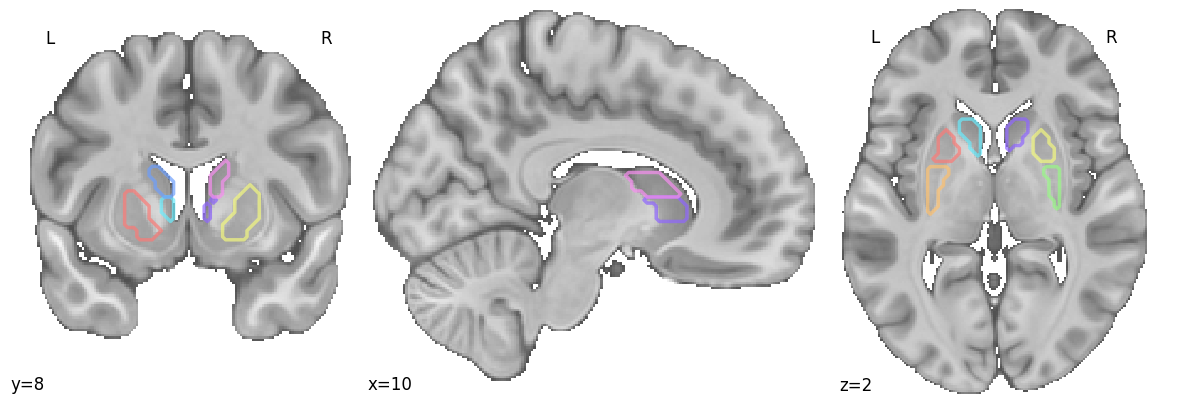

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from nilearn import plotting
import matplotlib.patches as patches

# Define your custom colors
custom_colors = ['#fb7b77', '#fdc170', '#f3f87f', '#98f786', '#69ebfc', '#6d9efc', '#8f66ff', '#f78ef0']

# Create a custom colormap
custom_cmap = ListedColormap(custom_colors)

fig, ax = plt.subplots(figsize=(15, 5))  # Adjusting the figsize to fit all images in one row

## Plotting Nilearn ROIs
display = plotting.plot_roi(
    img_mask, black_bg=False,
    bg_img=img_bg,
    display_mode='ortho', draw_cross=False,
    cut_coords=(10, 8, 2),  # Adjust these coordinates based on your needs
    view_type='contours', linewidths=2.5,
    cmap=custom_cmap,
    axes=ax
)

# Add legend
nax = fig.add_axes([0.55, 0.1, .16, .4])

cmap = plt.cm.get_cmap('gist_rainbow')
colors = np.round(np.linspace(0, cmap.N-1, len(list_label)+1)).astype(int)


nax.axis('off')

# plt.show()

# fname = '/home/kjh/Desktop/GP/figures/figS1/figS1.png'
# plt.savefig(fname, dpi=600)
# plt.close()